In [1]:
import numpy as np
import pandas as pd
import os
import math
import random 

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/LGaimers/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/LGaimers/test.csv')

In [3]:
below_standard_df = train_df[train_df['Y_Class']==0]
below_standard_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
22,TRAIN_022,0,0.517719,2022-06-14 8:53,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,TRAIN_023,0,0.519090,2022-06-14 9:01,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,TRAIN_028,0,0.521249,2022-06-19 20:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,TRAIN_034,0,0.521524,2022-06-21 17:36,T050304,A_31,NaN,NaN,NaN,NaN,...,55.03,52.24,55.33,57.49,67.31,1.0,NaN,NaN,NaN,NaN
66,TRAIN_066,0,0.524408,2022-06-25 21:38,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,NaN,NaN,NaN,NaN,...,51.71,59.64,54.61,57.05,63.18,1.0,NaN,NaN,NaN,NaN
584,TRAIN_584,0,0.519519,2022-09-05 11:09,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,TRAIN_585,0,0.515214,2022-09-05 11:17,T010306,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN


In [4]:
normal_standard_df = train_df[train_df['Y_Class']==1]
normal_standard_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
6,TRAIN_006,1,0.533665,2022-06-13 6:03,T050304,A_31,NaN,NaN,NaN,NaN,...,32.50,41.42,38.36,30.83,76.93,NaN,NaN,NaN,NaN,NaN
8,TRAIN_008,1,0.531821,2022-06-13 6:19,T050304,A_31,NaN,NaN,NaN,NaN,...,42.25,43.17,55.60,33.26,78.50,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,TRAIN_591,1,0.529308,2022-09-07 1:09,T100306,T_31,1.0,87.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,TRAIN_592,1,0.528349,2022-09-08 14:22,T100304,T_31,2.0,98.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
over_standard_df = train_df[train_df['Y_Class']==2]
over_standard_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
5,TRAIN_005,2,0.537833,2022-06-13 5:55,T050307,A_31,NaN,NaN,NaN,NaN,...,38.16,51.25,56.01,37.41,71.37,NaN,NaN,NaN,NaN,NaN
7,TRAIN_007,2,0.540003,2022-06-13 6:11,T050307,A_31,NaN,NaN,NaN,NaN,...,39.00,35.95,59.51,30.49,72.77,NaN,NaN,NaN,NaN,NaN
9,TRAIN_009,2,0.538049,2022-06-13 6:28,T050307,A_31,NaN,NaN,NaN,NaN,...,34.40,35.88,50.36,38.45,71.42,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,TRAIN_563,2,0.537465,2022-09-03 1:22,T050304,A_31,NaN,NaN,NaN,NaN,...,49.92,54.66,50.56,48.63,62.17,1.0,NaN,NaN,NaN,NaN
564,TRAIN_564,2,0.540106,2022-09-03 1:30,T050304,A_31,NaN,NaN,NaN,NaN,...,57.94,55.84,53.24,56.72,64.17,1.0,NaN,NaN,NaN,NaN
570,TRAIN_570,2,0.534951,2022-09-03 18:40,T100306,O_31,6.0,90.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,TRAIN_572,2,0.535205,2022-09-03 18:56,T100306,O_31,6.0,89.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
below_A = below_standard_df[below_standard_df['PRODUCT_CODE']=='A_31']
below_T = below_standard_df[below_standard_df['PRODUCT_CODE']=='T_31']
below_O = below_standard_df[below_standard_df['PRODUCT_CODE']=='O_31']

In [7]:
mean = np.mean(train_df['Y_Quality'])
mean

0.5308962650183946

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y_Quality', ylabel='Density'>

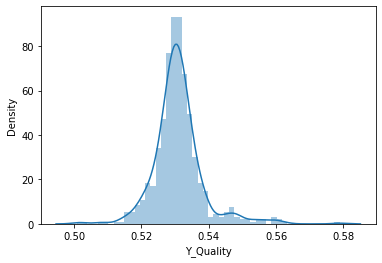

In [8]:
sns.distplot(train_df['Y_Quality'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y_Quality', ylabel='Density'>

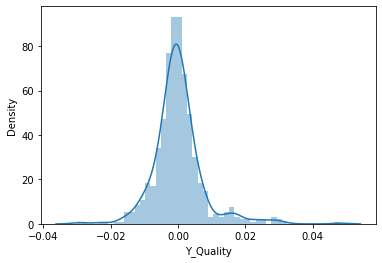

In [9]:
sns.distplot(train_df['Y_Quality']-mean)

In [10]:
below_standard_df = train_df[train_df['Y_Class']==0]
normal_standard_df = train_df[train_df['Y_Class']==1]
over_standard_df = train_df[train_df['Y_Class']==2]

log_below_A = below_standard_df[below_standard_df['PRODUCT_CODE']=='A_31']
log_below_T = below_standard_df[below_standard_df['PRODUCT_CODE']=='T_31']
log_below_O = below_standard_df[below_standard_df['PRODUCT_CODE']=='O_31']

log_normal_A = normal_standard_df[normal_standard_df['PRODUCT_CODE']=='A_31']
log_normal_T = normal_standard_df[normal_standard_df['PRODUCT_CODE']=='T_31']
log_normal_O = normal_standard_df[normal_standard_df['PRODUCT_CODE']=='O_31']

log_over_A = over_standard_df[over_standard_df['PRODUCT_CODE']=='A_31']
log_over_T = over_standard_df[over_standard_df['PRODUCT_CODE']=='T_31']
log_over_O = over_standard_df[over_standard_df['PRODUCT_CODE']=='O_31']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y_Quality'>

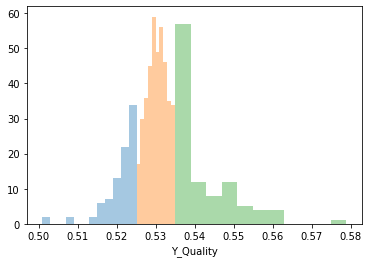

In [11]:
sns.distplot(below_standard_df['Y_Quality'], kde=False)
sns.distplot(normal_standard_df['Y_Quality'], kde=False)
sns.distplot(over_standard_df['Y_Quality'], kde=False)

In [31]:
# y quality scaling
# train_df['Y_Quality'] = train_df['Y_Quality'].map(lambda x : np.log2(x))
train_df['log_Y_Quality'] = train_df['Y_Quality'].map(lambda x : np.log(x))
train_df['log2_Y_Quality'] = train_df['Y_Quality'].map(lambda x : np.log2(x))
train_df['loglog_Y_Quality'] = train_df['log_Y_Quality'].map(lambda x : np.log(1+x))

In [32]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,log_Y_Quality,log2_Y_Quality,loglog_Y_Quality
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,34.09,77.77,NaN,NaN,NaN,NaN,NaN,-0.628421,-0.906620,-0.989994
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,35.34,72.55,NaN,NaN,NaN,NaN,NaN,-0.612823,-0.884117,-0.948874
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,36.53,78.35,NaN,NaN,NaN,NaN,NaN,-0.632491,-0.912492,-1.001008
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,30.58,71.78,NaN,NaN,NaN,NaN,NaN,-0.621151,-0.896132,-0.970619
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,33.09,76.97,NaN,NaN,NaN,NaN,NaN,-0.631882,-0.911613,-0.999351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.641417,-0.925368,-1.025594
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,55.10,66.49,1.0,NaN,NaN,NaN,NaN,-0.646221,-0.932300,-1.039083
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-0.651451,-0.939845,-1.053976
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.632288,-0.912199,-1.000455


In [14]:
below_standard_df = train_df[train_df['Y_Class']==0]
normal_standard_df = train_df[train_df['Y_Class']==1]
over_standard_df = train_df[train_df['Y_Class']==2]

log_below_A = below_standard_df[below_standard_df['PRODUCT_CODE']=='A_31']
log_below_T = below_standard_df[below_standard_df['PRODUCT_CODE']=='T_31']
log_below_O = below_standard_df[below_standard_df['PRODUCT_CODE']=='O_31']

log_normal_A = normal_standard_df[normal_standard_df['PRODUCT_CODE']=='A_31']
log_normal_T = normal_standard_df[normal_standard_df['PRODUCT_CODE']=='T_31']
log_normal_O = normal_standard_df[normal_standard_df['PRODUCT_CODE']=='O_31']

log_over_A = over_standard_df[over_standard_df['PRODUCT_CODE']=='A_31']
log_over_T = over_standard_df[over_standard_df['PRODUCT_CODE']=='T_31']
log_over_O = over_standard_df[over_standard_df['PRODUCT_CODE']=='O_31']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_Y_Quality'>

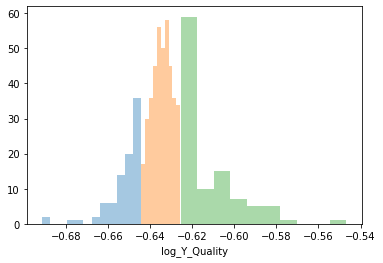

In [15]:
sns.distplot(below_standard_df['log_Y_Quality'], kde=False)
sns.distplot(normal_standard_df['log_Y_Quality'], kde=False)
sns.distplot(over_standard_df['log_Y_Quality'], kde=False)

In [36]:
log_mean = np.mean(train_df['log_Y_Quality'])
log2_mean = np.mean(train_df['log2_Y_Quality'])
loglog_mean = np.mean(train_df['loglog_Y_Quality'])

log_std = np.std(train_df['log_Y_Quality'])
log2_std = np.std(train_df['log2_Y_Quality'])
loglog_std = np.std(train_df['loglog_Y_Quality'])

print(log_mean, log2_mean, loglog_mean)
print(log_std, log2_std, loglog_std)

-0.6332846716977553 -0.9136366553293468 -1.003865663757602
0.013825422611591224 0.019945868639936803 0.037151765172934566


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


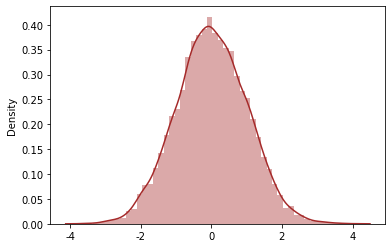

In [27]:
from scipy.stats import norm
import seaborn as sns
normal = norm.rvs(size=10000, loc=0, scale=1)
ax = sns.distplot(normal, color='brown', label='normal')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='loglog_Y_Quality', ylabel='Density'>

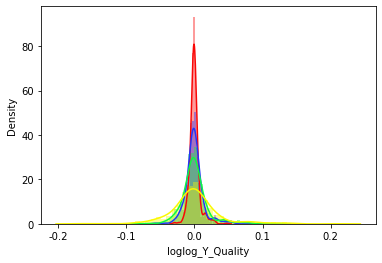

In [35]:
sns.distplot(train_df['Y_Quality']-mean, color='#FA0706', label='Y_Quality') # 빨간색
sns.distplot(train_df['log_Y_Quality']-log_mean, color='#2334FA', label='log_Y_Quality') # 파란색
sns.distplot(train_df['log2_Y_Quality']-log2_mean, color='#0DFA42', label='log2_Y_Quality') # 초록색
sns.distplot(train_df['loglog_Y_Quality']-loglog_mean, color='#FAF800', label='loglog_Y_Quality') # 노란색